In [1]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
test_df= pd.read_csv('test.csv')

In [3]:
test_df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR


In [4]:
train_df = pd.read_csv('train.csv')

In [5]:
train_df.head()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                243787 non-null  f

In [6]:
def split_df(df):
    '''
    split a data frame to three, numerical, categorical and churn
    Arguments
        df (data frame) read and will be splitted to three data frame
    Return
        df_num (data frame) date frame made of numerical variable
        df_cate (data frame) data frame of categorical variables
        df_churn (data frame) data frame of churn and customerid which are not need to eda    
    '''
    df_churn = df[['CustomerID', 'Churn']]
    df = df.drop(['CustomerID'], axis = 1)
    df_num = df.select_dtypes(include = 'number')
   
    df_cate = df.select_dtypes(exclude = 'number')
    df_cate = pd.concat([df_cate,df['Churn']], axis = 1)
    return df_num, df_cate, df_churn


In [7]:
# Split data into categorical and numerical values
train_num, train_cate, train_churn = split_df(train_df)
print(train_num.info())
print(" ")
print(train_cate.info())
print(" ")
print(train_churn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   ViewingHoursPerWeek       243787 non-null  float64
 4   AverageViewingDuration    243787 non-null  float64
 5   ContentDownloadsPerMonth  243787 non-null  int64  
 6   UserRating                243787 non-null  float64
 7   SupportTicketsPerMonth    243787 non-null  int64  
 8   WatchlistSize             243787 non-null  int64  
 9   Churn                     243787 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 18.6 MB
None
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 


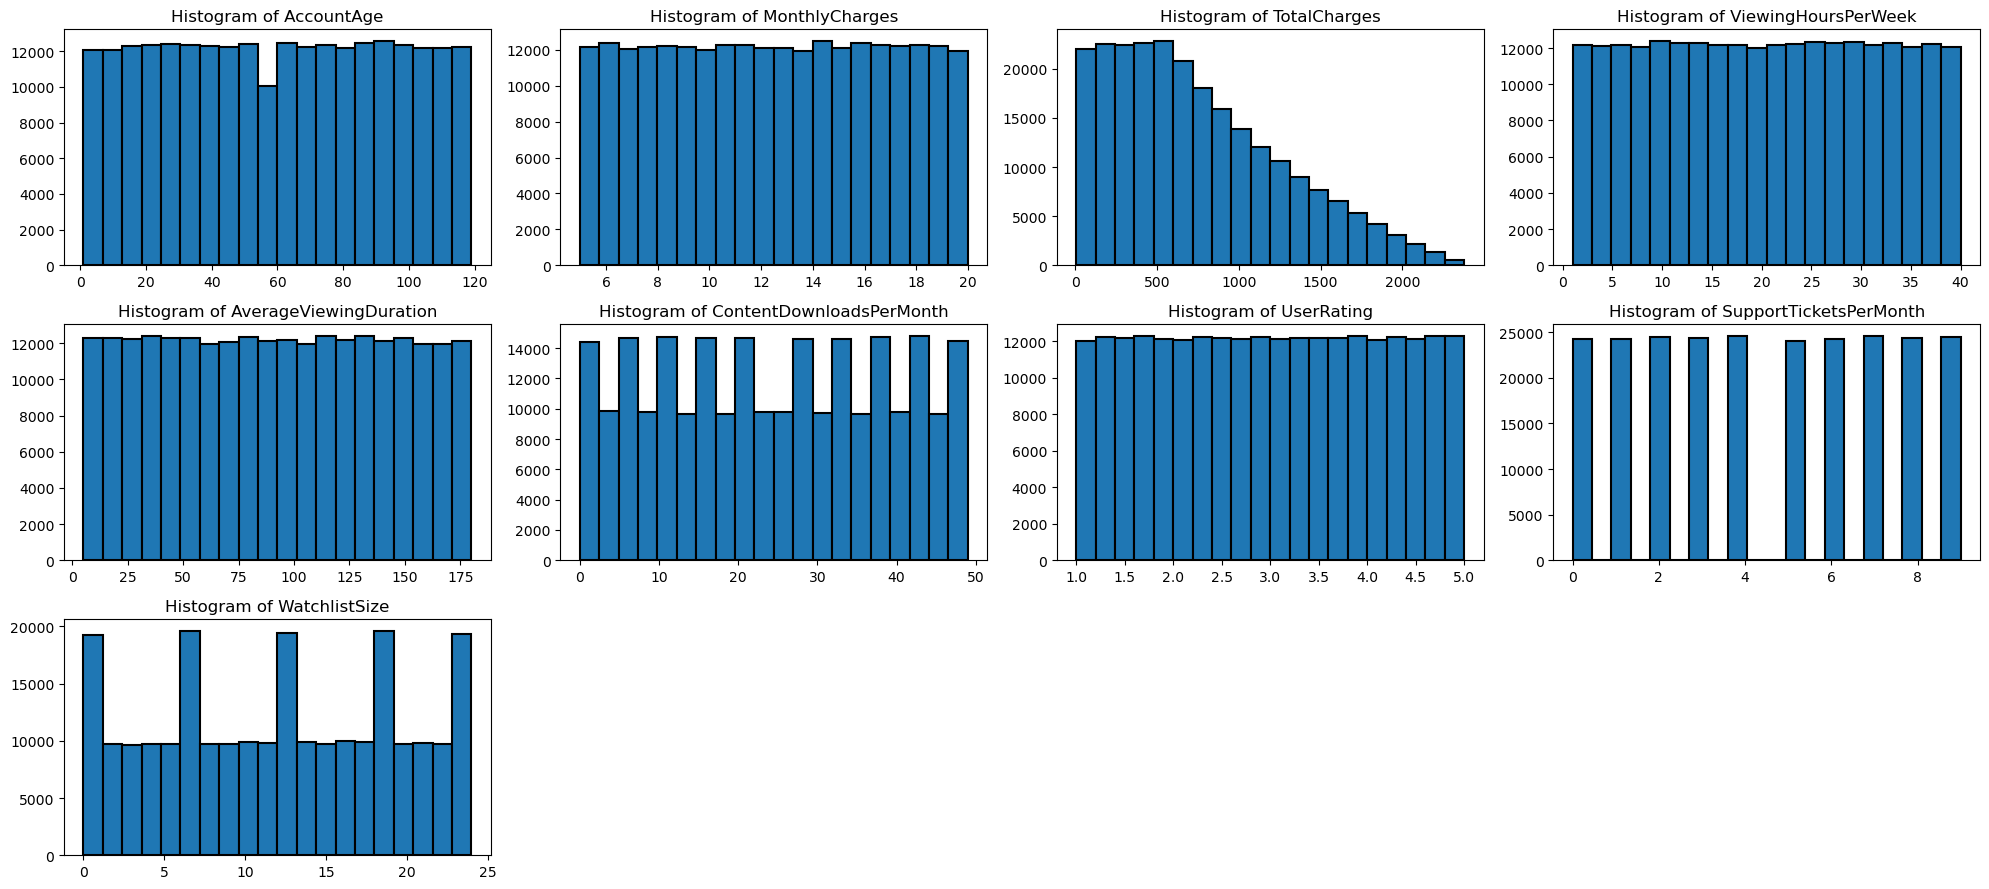

In [8]:
import math
import matplotlib.pyplot as plt

def plot_histograms(df, target_col='Churn', cols_per_row=4):
    """
    Plots histograms for all numerical columns in the DataFrame, excluding the target column.
    
    Parameters:
    - df: pandas DataFrame containing numerical features
    - target_col: column name to exclude from plotting (default = 'Churn')
    - cols_per_row: number of plots per row (default = 4)
    """
    # Filter out the target column
    columns = [col for col in df.columns if col != target_col]
    num_col = len(columns)
    
    # Compute rows and create subplots
    rows = math.ceil(num_col / cols_per_row)
    fig, axs = plt.subplots(rows, cols_per_row, figsize=(5 * cols_per_row, 3 * rows))
    axs = axs.flatten()

    for i, column in enumerate(columns):
        axs[i].hist(df[column], bins=20, linewidth=1.5, edgecolor='black')
        axs[i].set_title(f'Histogram of {column}')

    # Hide unused subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

plot_histograms(train_num)

In [9]:
from scipy.stats import pointbiserialr

def numerical_to_categorical_corr(df, target='Churn'):
    """
    Computes point-biserial correlation between numerical columns and a binary target column.
    
    Parameters:
    - df: DataFrame with numerical columns and binary target
    - target: name of the binary target column
    
    Returns:
    - DataFrame of correlation and p-values
    """
    results = []
    for col in df.columns:
        if col != target:
            corr, pval = pointbiserialr(df[col], df[target])
            results.append({'Feature': col, 'Correlation': corr, 'P-Value': pval})
    return pd.DataFrame(results).sort_values(by='Correlation', key=abs, ascending=False)


In [10]:
numerical_to_categorical_corr(train_num)

,Feature,Correlation,P-Value
0,AccountAge,-0.197736,0.000000e+00
4,AverageViewingDuration,-0.146897,0.000000e+00
5,ContentDownloadsPerMonth,-0.129752,0.000000e+00
3,ViewingHoursPerWeek,-0.128645,0.000000e+00
2,TotalCharges,-0.120529,0.000000e+00
1,MonthlyCharges,0.100473,0.000000e+00
7,SupportTicketsPerMonth,0.084064,0.000000e+00
6,UserRating,0.022124,8.777897e-28
8,WatchlistSize,0.021739,6.999222e-27


C:\Users\soonn\AppData\Local\Temp\ipykernel_27456\3667265431.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=corr_df, x='Correlation', y='Feature', palette='coolwarm')


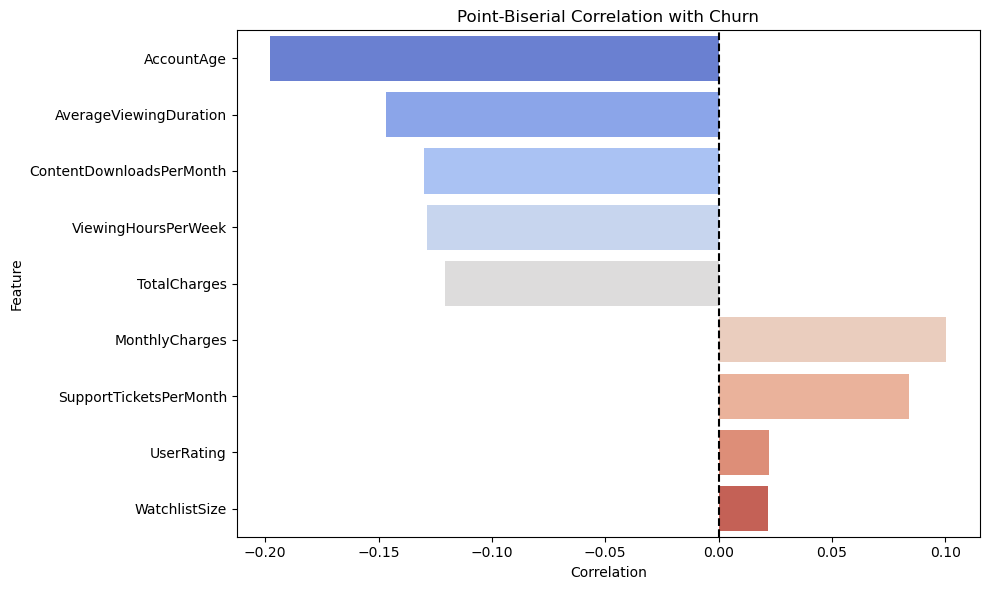

In [11]:
corr_df = numerical_to_categorical_corr(train_num)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=corr_df, x='Correlation', y='Feature', palette='coolwarm')
plt.title('Point-Biserial Correlation with Churn')
plt.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_all_distributions_by_target(df, target='Churn'):
    """
    Plots KDE distributions for all numerical features in the DataFrame,
    grouped by the binary target variable.
    
    Parameters:
    - df: pandas DataFrame
    - target: name of the binary target column (default: 'Churn')
    """
    numeric_cols = df.select_dtypes(include='number').columns.tolist()
    if target in numeric_cols:
        numeric_cols.remove(target)

    for feature in numeric_cols:
        plt.figure(figsize=(8, 4))
        sns.kdeplot(data=df, x=feature, hue=target, fill=True, common_norm=False, alpha=0.5)
        plt.title(f'Distribution of {feature} by {target}')
        plt.xlabel(feature)
        plt.ylabel('Density')
        plt.tight_layout()
        plt.show()


<Axes: xlabel='TotalCharges'>

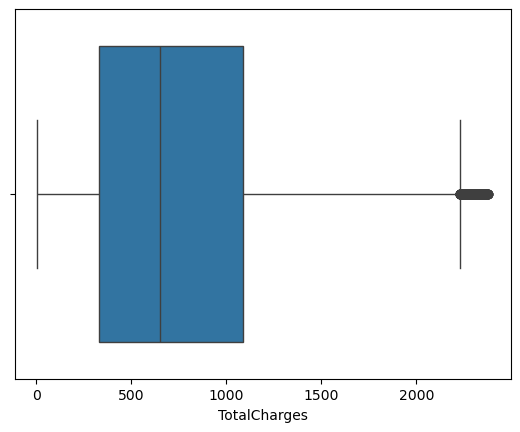

In [13]:
train_num_filtered = train_num.drop(['SupportTicketsPerMonth','UserRating','WatchlistSize'],axis = 1)

sns.boxplot(x ='TotalCharges', data = train_num_filtered)



In [14]:
def apply_iqr_capping(df, columns=None):
    """
    Replaces values beyond IQR bounds with lower or upper bounds.
    - Values < lower bound -> set to lower bound
    - Values > upper bound -> set to upper bound

    Parameters:
    - df: pandas DataFrame
    - columns: list of numerical columns to process (default = all numerical columns)

    Returns:
    - df_capped: DataFrame with values capped at IQR boundaries
    """
    if columns is None:
        columns = df.select_dtypes(include='number').columns.tolist()

    df_capped = df.copy()

    for col in columns:
        Q1 = df_capped[col].quantile(0.25)
        Q3 = df_capped[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        # Apply bounds directly
        df_capped.loc[df_capped[col] < lower, col] = lower
        df_capped.loc[df_capped[col] > upper, col] = upper

    return df_capped
train_num_filtered_NoOutliers = apply_iqr_capping(train_num_filtered, ['TotalCharges'])


<Axes: xlabel='TotalCharges'>

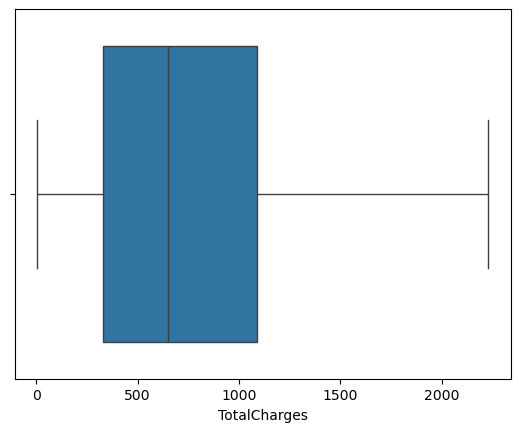

In [15]:
sns.boxplot(x ='TotalCharges', data = train_num_filtered_NoOutliers)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   ViewingHoursPerWeek       243787 non-null  float64
 4   AverageViewingDuration    243787 non-null  float64
 5   ContentDownloadsPerMonth  243787 non-null  int64  
 6   Churn                     243787 non-null  int64  
 7   TotalCharges_log          243787 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 14.9 MB


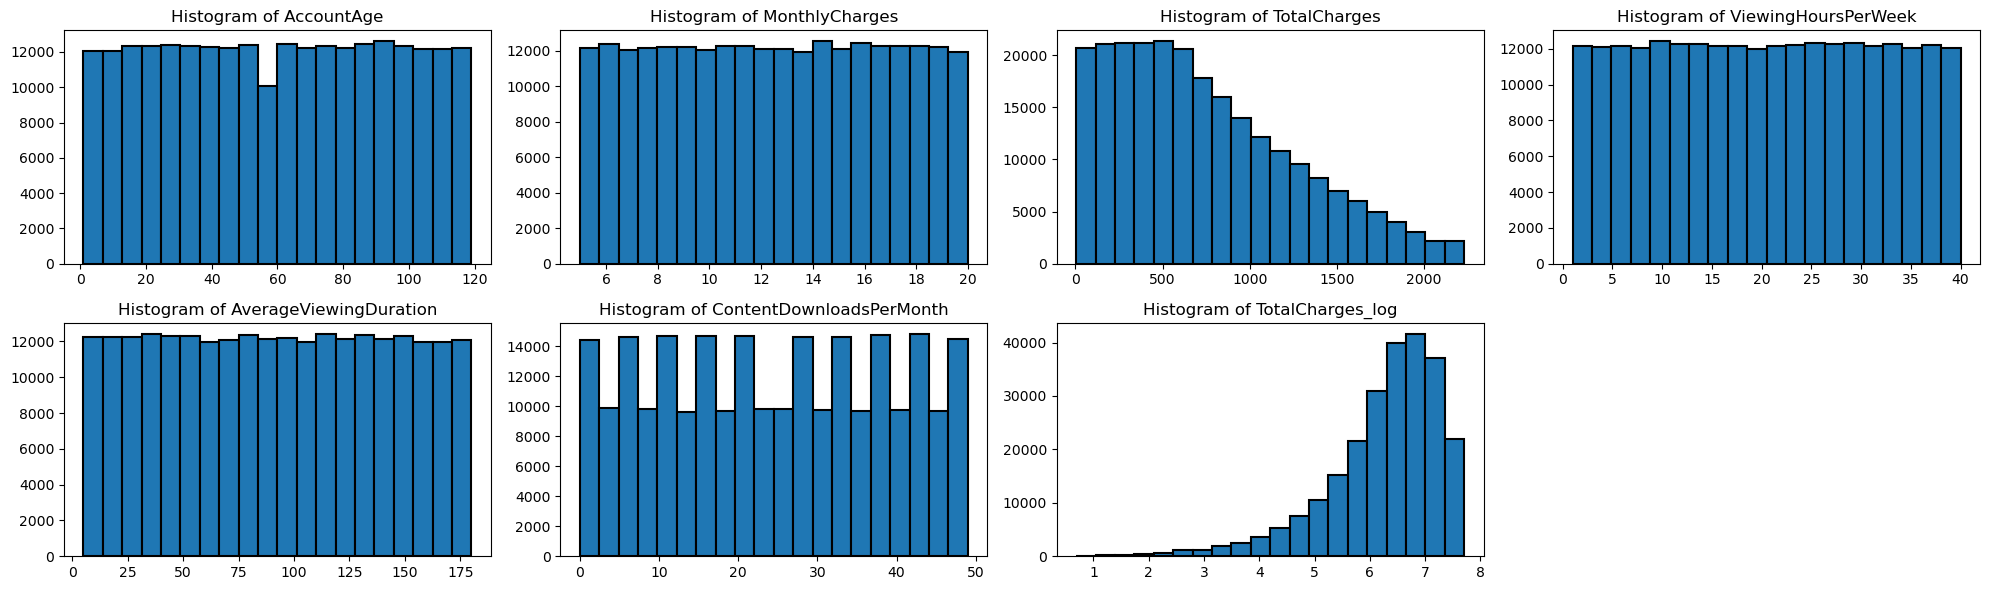

In [31]:
train_num_filtered_NoOutliers.info()
plot_histograms(train_num_filtered_NoOutliers)

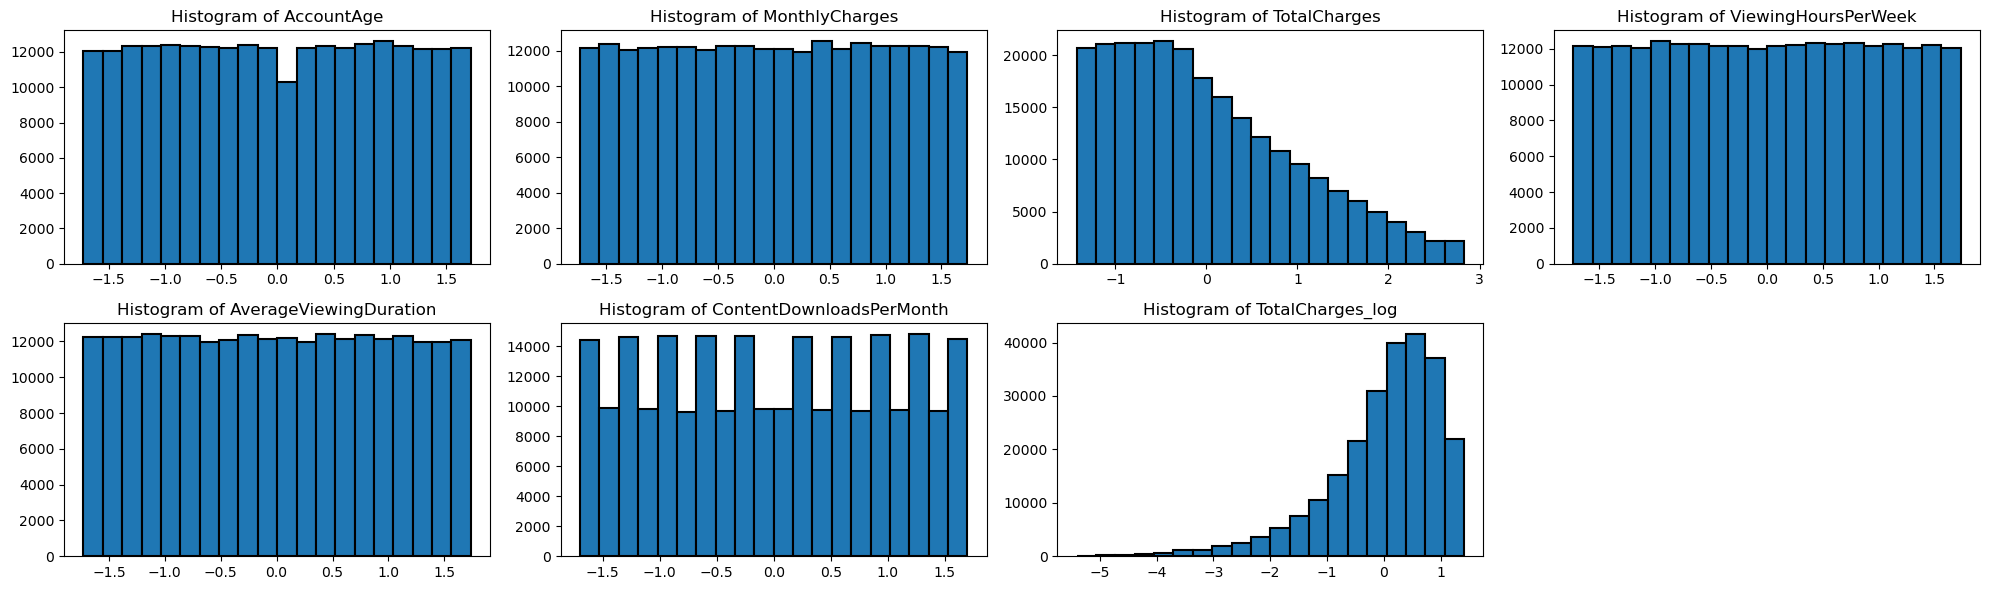

In [34]:
train_num_filtered_NoOutliers.head()
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit_transform(train_num_filtered_NoOutliers)
X_scaled = ss.transform(train_num_filtered_NoOutliers)
X_scaled
X_scaled_df = pd.DataFrame(X_scaled, columns=train_num_filtered_NoOutliers.columns)
X_scaled_df.head()

plot_histograms(X_scaled_df)
X_scaled_df = X_scaled_df.drop(['TotalCharges_log'], axis = 1)

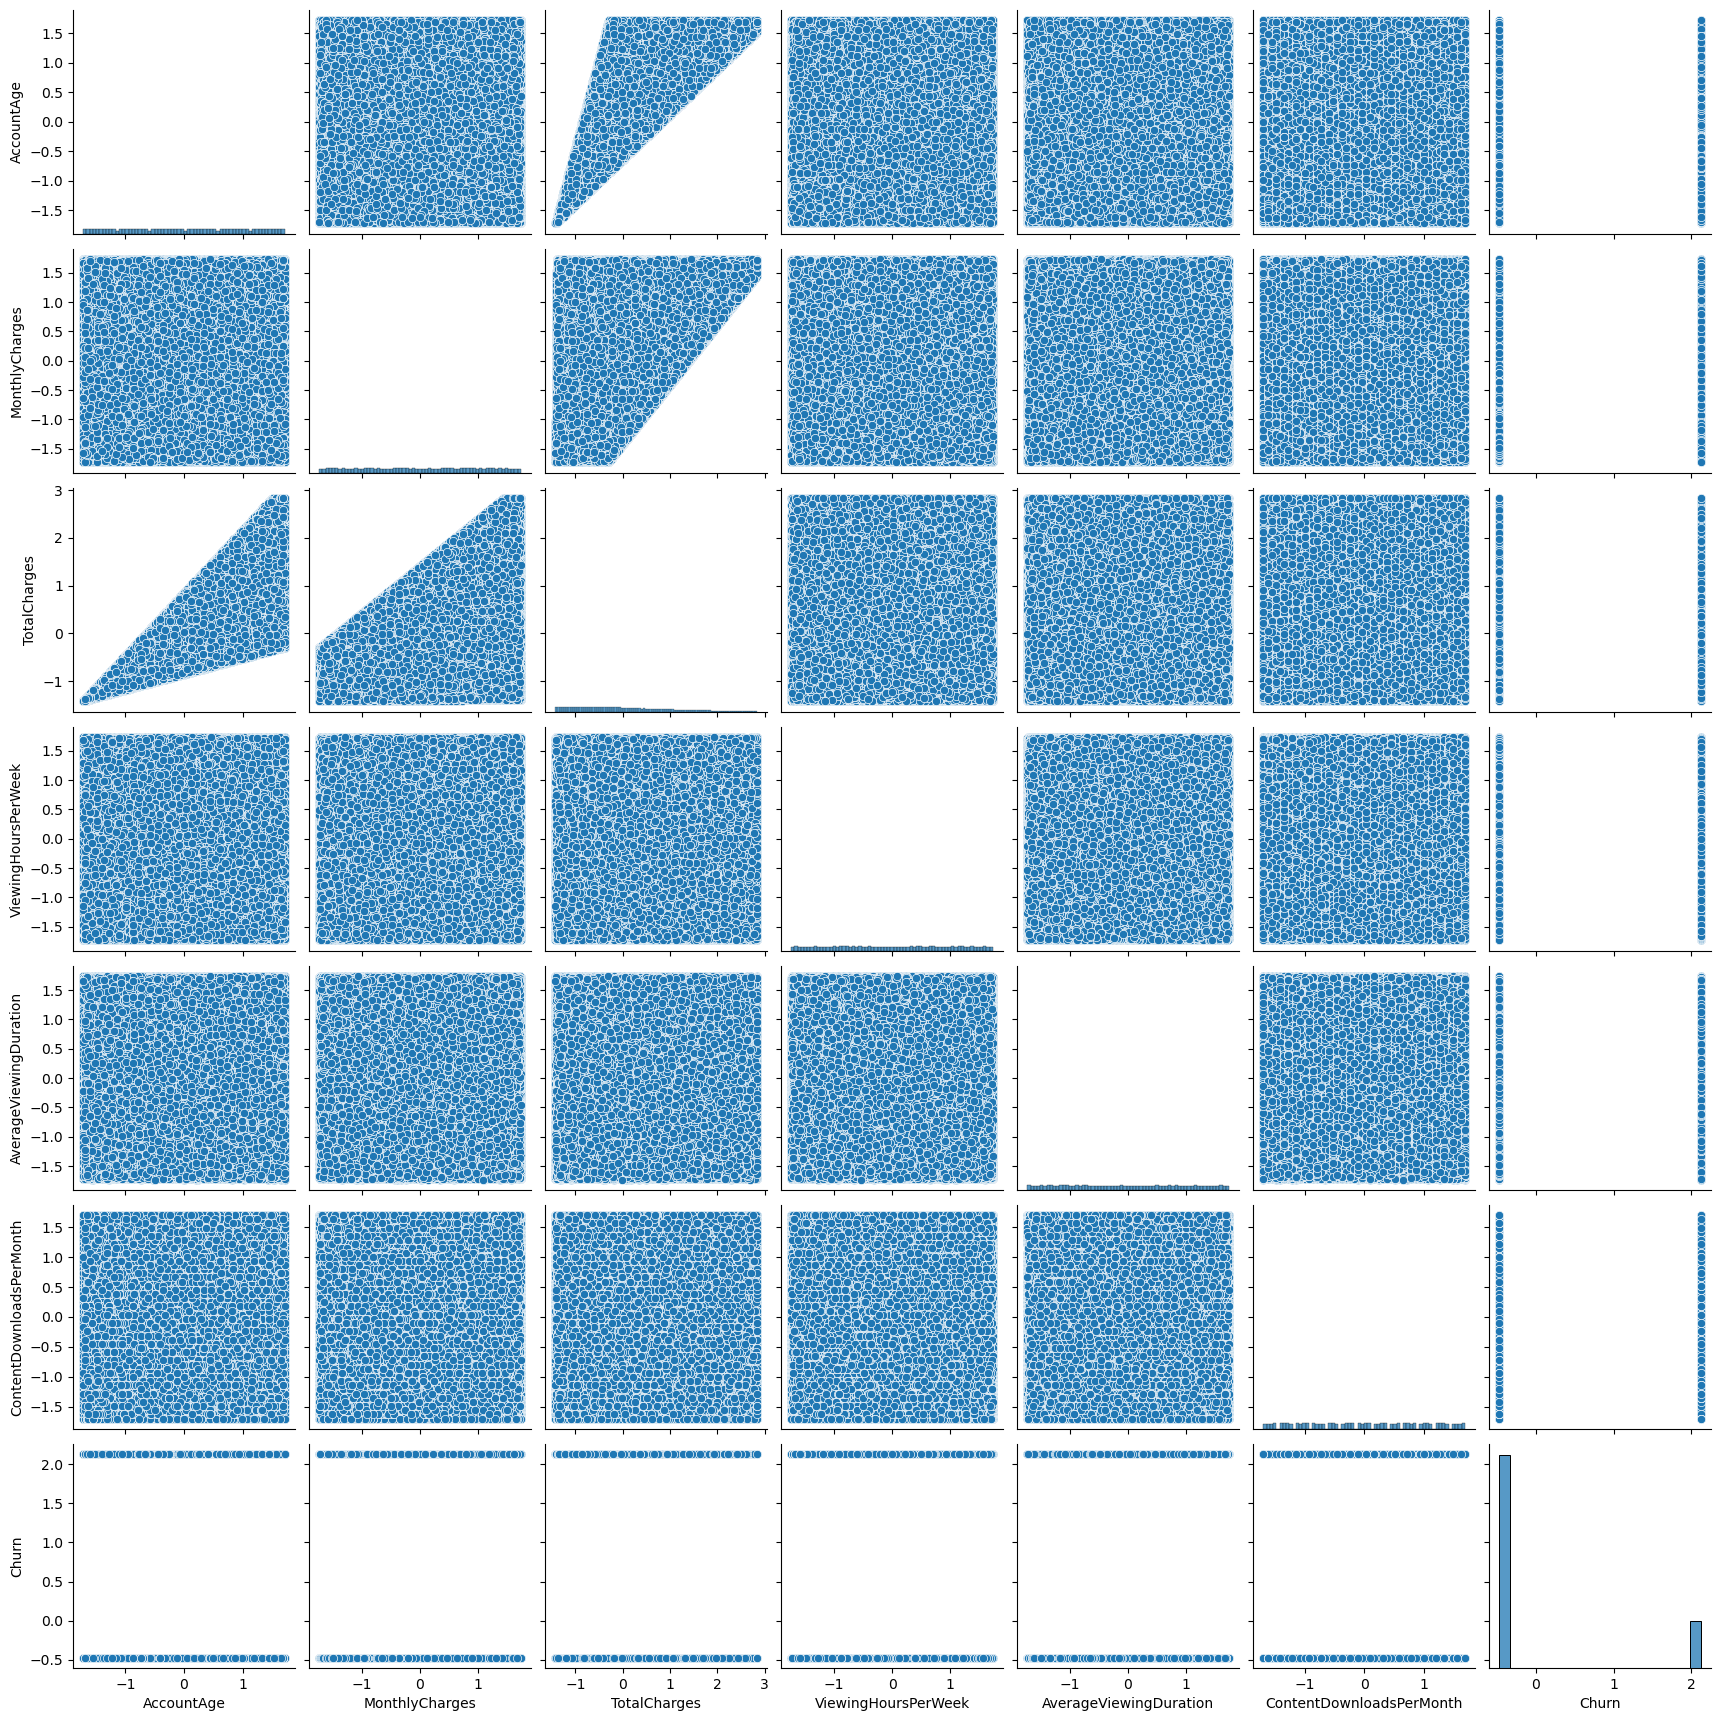

In [35]:
sns.pairplot(X_scaled_df)

C:\Users\soonn\AppData\Local\Temp\ipykernel_27456\1498090506.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(['Stay (0)', 'Churn (1)'])  # Rename x-axis labels
C:\Users\soonn\AppData\Local\Temp\ipykernel_27456\1498090506.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(['Stay (0)', 'Churn (1)'])  # Rename x-axis labels
C:\Users\soonn\AppData\Local\Temp\ipykernel_27456\1498090506.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(['Stay (0)', 'Churn (1)'])  # Rename x-axis labels
C:\Users\soonn\AppData\Local\Temp\ipykernel_27456\1498090506.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a Fi

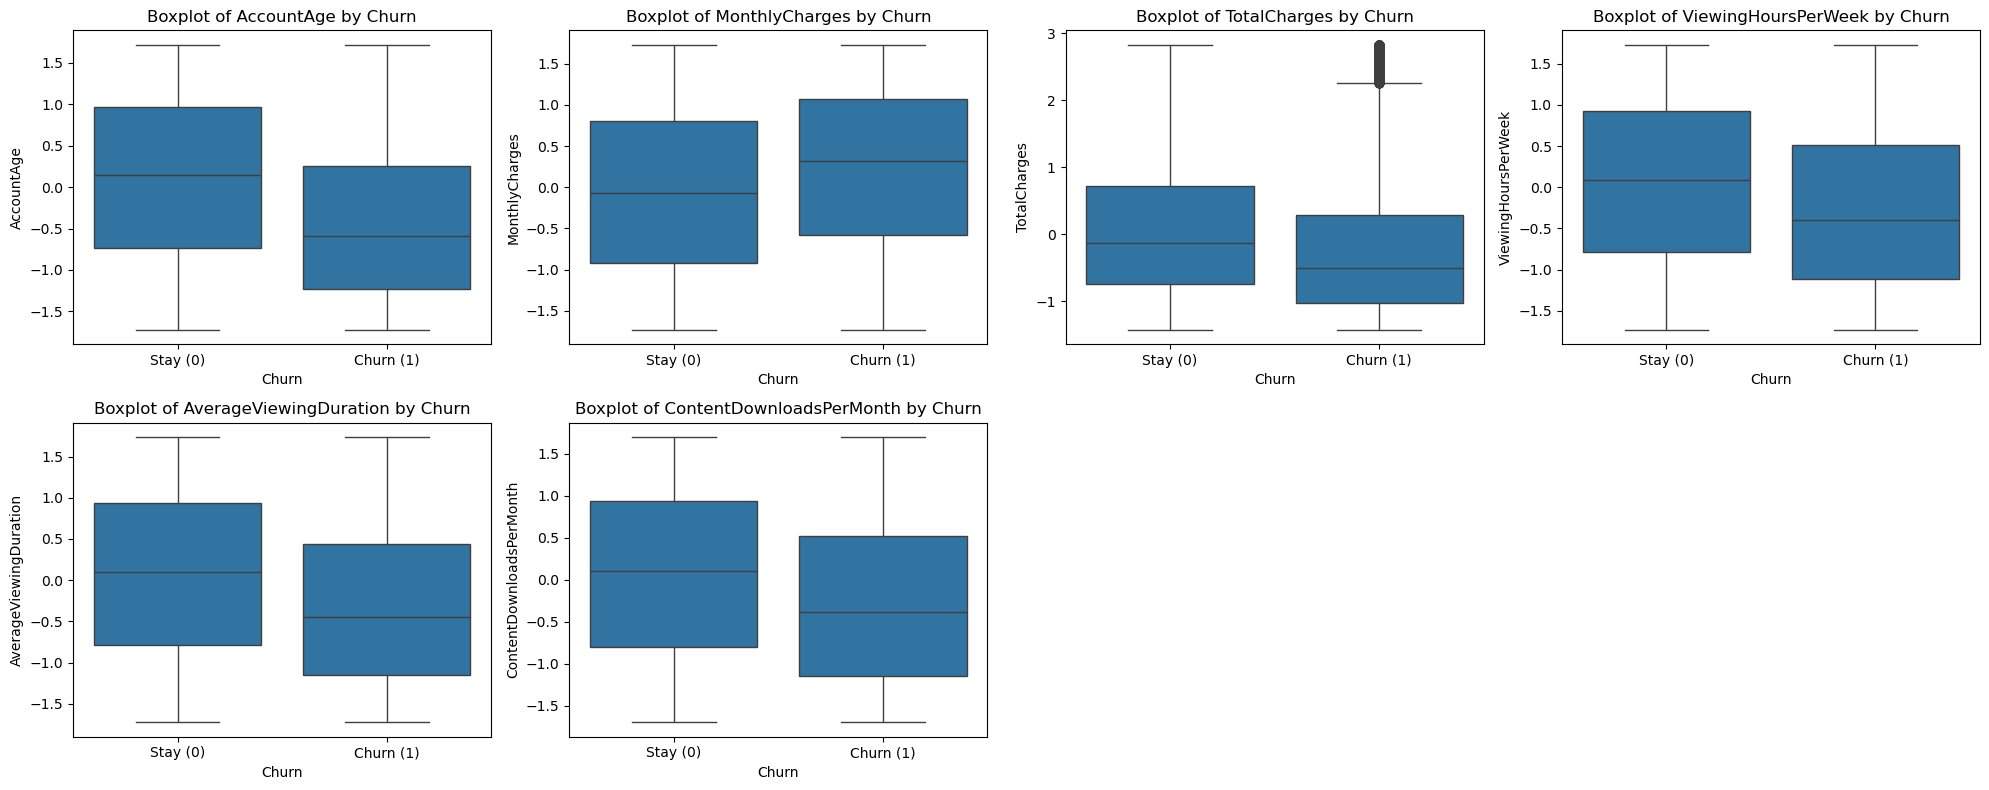

In [38]:

import matplotlib.pyplot as plt
import seaborn as sns
import math

def plot_boxplots(df, target_col='Churn', cols_per_row=4):
    """
    Plots boxplots for all numerical columns in the DataFrame, using the target column as x-axis.
    Shows 'Stay' for 0 and 'Churn' for 1 on the x-axis.
    
    Parameters:
    - df: pandas DataFrame containing numerical features
    - target_col: column name to use as x-axis (default = 'Churn')
    - cols_per_row: number of plots per row (default = 4)
    """
    # Filter out the target column
    columns = [col for col in df.columns if col != target_col]
    num_col = len(columns)

    # Compute rows and create subplots
    rows = math.ceil(num_col / cols_per_row)
    fig, axs = plt.subplots(rows, cols_per_row, figsize=(5 * cols_per_row, 4 * rows))
    axs = axs.flatten()

    for i, column in enumerate(columns):
        sns.boxplot(x=target_col, y=column, data=df, ax=axs[i])
        axs[i].set_title(f'Boxplot of {column} by {target_col}')
        axs[i].set_xticklabels(['Stay (0)', 'Churn (1)'])  # Rename x-axis labels

    # Hide unused subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()


plot_boxplots(X_scaled_df, target_col='Churn')



In [43]:
X_scaled_df.info()
X_scaled_df.describe(include = 'all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  float64
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   ViewingHoursPerWeek       243787 non-null  float64
 4   AverageViewingDuration    243787 non-null  float64
 5   ContentDownloadsPerMonth  243787 non-null  float64
 6   Churn                     243787 non-null  float64
dtypes: float64(7)
memory usage: 13.0 MB


,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,Churn
count,2.437870e+05,2.437870e+05,2.437870e+05,2.437870e+05,2.437870e+05,2.437870e+05,2.437870e+05
mean,9.501611e-17,-4.438360e-16,-1.270185e-16,-5.562815e-16,-6.482081e-17,-7.099977e-17,6.587007e-18
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-1.723308e+00,-1.733206e+00,-1.426700e+00,-1.734488e+00,-1.727815e+00,-1.699138e+00,-4.704755e-01
25%,-8.774593e-01,-8.670269e-01,-8.064181e-01,-8.661028e-01,-8.688555e-01,-8.670264e-01,-4.704755e-01
50%,-2.442974e-03,1.123191e-03,-1.926888e-01,1.862075e-03,-2.785589e-04,-3.491494e-02,-4.704755e-01
75%,8.725734e-01,8.659442e-01,6.481907e-01,8.642343e-01,8.641494e-01,8.665392e-01,-4.704755e-01
max,1.718423e+00,1.732889e+00,2.830104e+00,1.734081e+00,1.737154e+00,1.698651e+00,2.125509e+00


In [ ]:
train_cate

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

def chi_square_test(df, target='Churn'):
    """
    Performs Chi-Square test of independence between each categorical column and the target.

    Parameters:
    - df: pandas DataFrame
    - target: binary target column (e.g., 'Churn')

    Returns:
    - DataFrame with chi2 statistic and p-value for each categorical variable
    """
    results = []
    categorical_cols = df.select_dtypes(include='object').columns.tolist()
    if target in categorical_cols:
        categorical_cols.remove(target)

    for col in categorical_cols:
        try:
            contingency_table = pd.crosstab(df[col], df[target])
            chi2, p, dof, _ = chi2_contingency(contingency_table)
            results.append({
                'Feature': col,
                'Chi2': chi2,
                'P-Value': p
            })
        except Exception as e:
            print(f"Error processing {col}: {e}")

    return pd.DataFrame(results).sort_values(by='P-Value')


In [ ]:
chi_square_test(train_cate)


In [ ]:
train_cate_filtered =train_cate.drop(['DeviceRegistered','MultiDeviceAccess','PaperlessBilling'],axis = 1)

In [ ]:
for col in train_cate_filtered.columns:
    print(f'Unique values of {col}',train_cate_filtered[col].unique())

In [ ]:
train_cate_filtered_label = train_cate_filtered[['SubscriptionType' , 'PaymentMethod' ,'ContentType', 'GenrePreference' ]]
train_cate_filtered_hot = train_cate_filtered.drop(['SubscriptionType' , 'PaymentMethod' ,'ContentType', 'GenrePreference' ,'Churn'], axis = 1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

def apply_label_encoding(df, columns=None):
    """
    Applies Label Encoding to specified categorical columns.

    Parameters:
    - df: pandas DataFrame
    - columns: list of columns to label encode (default: all object columns)

    Returns:
    - df_encoded: DataFrame with label-encoded columns
    """
    df_encoded = df.copy()
    if columns is None:
        columns = df.select_dtypes(include='object').columns.tolist()

    le = LabelEncoder()
    for col in columns:
        try:
            df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
        except Exception as e:
            print(f"Could not encode {col}: {e}")
    return df_encoded


In [ ]:
df_lebel_encoded = apply_label_encoding(train_cate_filtered_label)
df_lebel_encoded.head()

In [ ]:
import pandas as pd

def one_hot_encode_with_get_dummies(df, columns=None, drop_first=True):
    """
    Applies One-Hot Encoding using pd.get_dummies().

    Parameters:
    - df: pandas DataFrame
    - columns: list of columns to encode (default: all object/categorical columns)
    - drop_first: whether to drop the first category to avoid multicollinearity

    Returns:
    - df_encoded: DataFrame with one-hot encoded columns
    """
    if columns is None:
        columns = df.select_dtypes(include='object').columns.tolist()

    df_encoded = pd.get_dummies(df, columns=columns, drop_first=drop_first)
    return df_encoded


In [ ]:
df_hot_encoded = one_hot_encode_with_get_dummies(train_cate_filtered_hot)
df_hot_encoded.head()

In [ ]:
df_cate_final = pd.concat([df_hot_encoded,df_lebel_encoded], axis = 1)
df_cate_final.head()

In [ ]:
df_final = pd.concat([df_cate_final,X_scaled_df],axis = 1)

print(df_final.info())
df_final.head()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [ ]:

X = df_final.drop('Churn', axis=1)
y = df_final['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)